In [35]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [36]:
from google.colab import files
uploaded=files.upload()

Saving my_movies.csv to my_movies (2).csv


In [37]:
df=pd.read_csv("my_movies.csv")
df

V1             V2             V3          V4     V5  \
0    Sixth Sense          LOTR1  Harry Potter1  Green Mile  LOTR2   
1      Gladiator        Patriot     Braveheart         NaN    NaN   
2          LOTR1          LOTR2            NaN         NaN    NaN   
3      Gladiator        Patriot    Sixth Sense         NaN    NaN   
4      Gladiator        Patriot    Sixth Sense         NaN    NaN   
5      Gladiator        Patriot    Sixth Sense         NaN    NaN   
6  Harry Potter1  Harry Potter2            NaN         NaN    NaN   
7      Gladiator        Patriot            NaN         NaN    NaN   
8      Gladiator        Patriot    Sixth Sense         NaN    NaN   
9    Sixth Sense           LOTR      Gladiator  Green Mile    NaN   

   Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [39]:
df.head()

V1       V2             V3          V4     V5  Sixth Sense  \
0  Sixth Sense    LOTR1  Harry Potter1  Green Mile  LOTR2            1   
1    Gladiator  Patriot     Braveheart         NaN    NaN            0   
2        LOTR1    LOTR2            NaN         NaN    NaN            0   
3    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   
4    Gladiator  Patriot    Sixth Sense         NaN    NaN            1   

   Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  Harry Potter2  LOTR  \
0          0      1              1        0      1              0     0   
1          1      0              0        1      0              0     0   
2          0      1              0        0      1              0     0   
3          1      0              0        1      0              0     0   
4          1      0              0        1      0              0     0   

   Braveheart  Green Mile  
0           0           1  
1           1           0  
2           0           0  
3           0           0  
4           0           0

In [40]:
data=df.drop(df.columns[[0,1,2,3,4]],axis=1)


In [41]:
data

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [42]:
df1=pd.DataFrame(data)
df1

Sixth Sense  Gladiator  LOTR1  Harry Potter1  Patriot  LOTR2  \
0            1          0      1              1        0      1   
1            0          1      0              0        1      0   
2            0          0      1              0        0      1   
3            1          1      0              0        1      0   
4            1          1      0              0        1      0   
5            1          1      0              0        1      0   
6            0          0      0              1        0      0   
7            0          1      0              0        1      0   
8            1          1      0              0        1      0   
9            1          1      0              0        0      0   

   Harry Potter2  LOTR  Braveheart  Green Mile  
0              0     0           0           1  
1              0     0           1           0  
2              0     0           0           0  
3              0     0           0           0  
4              0     0           0           0  
5              0     0           0           0  
6              1     0           0           0  
7              0     0           0           0  
8              0     0           0           0  
9              0     1           0           1

In [43]:
df1.shape

(10, 10)

In [45]:
#apriori algorithm
#1
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Patriot, Sixth Sense)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Patriot, Gladiator)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Harry Potter1, Green Mile)
27      0.1                              (Patriot, Braveheart)
28      0.1                                (LOTR2, Green Mile)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Patriot, Sixth Sense, Gladiator)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Green Mile, Sixth Sense, Gladiator)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (Harry Potter1, Sixth Sense, LOTR2)
37      0.1           (Harry Potter1, Green Mile, Sixth Sense)
38      0.1                   (LOTR2, Green Mile, Sixth Sense)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Patriot, Gladiator, Braveheart)
41      0.1                      (Green Mile, LOTR, Gladiator)
42      0.1                      (Harry Potter1, LOTR2, LOTR1)
43      0.1                 (Harry Potter1, Green Mile, LOTR1)
44      0.1                         (LOTR2, Green Mile, LOTR1)
45      0.1                 (Harry Potter1, Green Mile, LOTR2)
46      0.1         (Green Mile, LOTR, Sixth Sense, Gladiator)
47      0.1         (Harry Potter1, Sixth Sense, LOTR2, LOTR1)
48      0.1    (Harry Potter1, Green Mile, Sixth Sense, LOTR1)
49      0.1            (LOTR2, Green Mile, Sixth Sense, LOTR1)
50      0.1    (Harry Potter1, Green Mile, Sixth Sense, LOTR2)
51      0.1          (Harry Potter1, Green Mile, LOTR2, LOTR1)
52      0.1  (LOTR2, Green Mile, LOTR1, Sixth Sense, Harry ...

In [46]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rules

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
2      (Sixth Sense)                                          (LOTR1)   
3            (LOTR1)                                    (Sixth Sense)   
4    (Harry Potter1)                                    (Sixth Sense)   
..               ...                                              ...   
245          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
246     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
247          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
248    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
249  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
2                   0.6                 0.2      0.1    0.166667  0.833333   
3                   0.2                 0.6      0.1    0.500000  0.833333   
4                   0.2                 0.6      0.1    0.500000  0.833333   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.2                 0.1      0.1    0.500000  5.000000   
248                 0.6                 0.1      0.1    0.166667  1.666667   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
2       -0.02        0.96  
3       -0.02        0.80  
4       -0.02        0.80  
..        ...         ...  
245      0.08        1.80  
246      0.08        1.80  
247      0.08        1.80  
248      0.04        1.08  
249      0.08        1.80  

[250 rows x 9 columns]

In [47]:
rules[rules.duplicated()].shape

(0, 9)

In [48]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents                   consequents  \
186                   (Green Mile, LOTR1)          (LOTR2, Sixth Sense)   
213                   (LOTR2, Green Mile)        (Harry Potter1, LOTR1)   
155                (Harry Potter1, LOTR2)          (Sixth Sense, LOTR1)   
225            (LOTR2, Green Mile, LOTR1)  (Harry Potter1, Sixth Sense)   
173                  (Sixth Sense, LOTR1)   (Harry Potter1, Green Mile)   
138  (Green Mile, Sixth Sense, Gladiator)                        (LOTR)   
156                (Harry Potter1, LOTR1)          (LOTR2, Sixth Sense)   
172                   (Green Mile, LOTR1)  (Harry Potter1, Sixth Sense)   
187                  (Sixth Sense, LOTR1)           (LOTR2, Green Mile)   
158                  (Sixth Sense, LOTR1)        (Harry Potter1, LOTR2)   
214                   (Green Mile, LOTR1)        (Harry Potter1, LOTR2)   
212                (Harry Potter1, LOTR1)           (LOTR2, Green Mile)   
226      (LOTR2, Green Mile, Sixth Sense)        (Harry Potter1, LOTR1)   
211                (Harry Potter1, LOTR2)           (Green Mile, LOTR1)   
169          (Harry Potter1, Sixth Sense)           (Green Mile, LOTR1)   
168           (Harry Potter1, Green Mile)          (Sixth Sense, LOTR1)   
107               (Green Mile, Gladiator)                        (LOTR)   
201                  (LOTR2, Sixth Sense)   (Harry Potter1, Green Mile)   
200                   (LOTR2, Green Mile)  (Harry Potter1, Sixth Sense)   
110                                (LOTR)       (Green Mile, Gladiator)   

     antecedent support  consequent support  support  confidence  lift  \
186                 0.1                 0.1      0.1         1.0  10.0   
213                 0.1                 0.1      0.1         1.0  10.0   
155                 0.1                 0.1      0.1         1.0  10.0   
225                 0.1                 0.1      0.1         1.0  10.0   
173                 0.1                 0.1      0.1         1.0  10.0   
138                 0.1                 0.1      0.1         1.0  10.0   
156                 0.1                 0.1      0.1         1.0  10.0   
172                 0.1                 0.1      0.1         1.0  10.0   
187                 0.1                 0.1      0.1         1.0  10.0   
158                 0.1                 0.1      0.1         1.0  10.0   
214                 0.1                 0.1      0.1         1.0  10.0   
212                 0.1                 0.1      0.1         1.0  10.0   
226                 0.1                 0.1      0.1         1.0  10.0   
211                 0.1                 0.1      0.1         1.0  10.0   
169                 0.1                 0.1      0.1         1.0  10.0   
168                 0.1                 0.1      0.1         1.0  10.0   
107                 0.1                 0.1      0.1         1.0  10.0   
201                 0.1                 0.1      0.1         1.0  10.0   
200                 0.1                 0.1      0.1         1.0  10.0   
110                 0.1                 0.1      0.1         1.0  10.0   

     leverage  conviction  
186      0.09         inf  
213      0.09         inf  
155      0.09         inf  
225      0.09         inf  
173      0.09         inf  
138      0.09         inf  
156      0.09         inf  
172      0.09         inf  
187      0.09         inf  
158      0.09         inf  
214      0.09         inf  
212      0.09         inf  
226      0.09         inf  
211      0.09         inf  
169      0.09         inf  
168      0.09         inf  
107      0.09         inf  
201      0.09         inf  
200      0.09         inf  
110      0.09         inf

In [49]:
rules[rules.lift>1]

antecedents                                      consequents  \
0      (Sixth Sense)                                      (Gladiator)   
1        (Gladiator)                                    (Sixth Sense)   
6          (Patriot)                                    (Sixth Sense)   
7      (Sixth Sense)                                        (Patriot)   
10            (LOTR)                                    (Sixth Sense)   
..               ...                                              ...   
245          (LOTR2)  (Harry Potter1, Green Mile, Sixth Sense, LOTR1)   
246     (Green Mile)       (LOTR2, Harry Potter1, Sixth Sense, LOTR1)   
247          (LOTR1)  (LOTR2, Green Mile, Harry Potter1, Sixth Sense)   
248    (Sixth Sense)        (LOTR2, Green Mile, Harry Potter1, LOTR1)   
249  (Harry Potter1)          (LOTR2, Green Mile, Sixth Sense, LOTR1)   

     antecedent support  consequent support  support  confidence      lift  \
0                   0.6                 0.7      0.5    0.833333  1.190476   
1                   0.7                 0.6      0.5    0.714286  1.190476   
6                   0.6                 0.6      0.4    0.666667  1.111111   
7                   0.6                 0.6      0.4    0.666667  1.111111   
10                  0.1                 0.6      0.1    1.000000  1.666667   
..                  ...                 ...      ...         ...       ...   
245                 0.2                 0.1      0.1    0.500000  5.000000   
246                 0.2                 0.1      0.1    0.500000  5.000000   
247                 0.2                 0.1      0.1    0.500000  5.000000   
248                 0.6                 0.1      0.1    0.166667  1.666667   
249                 0.2                 0.1      0.1    0.500000  5.000000   

     leverage  conviction  
0        0.08        1.80  
1        0.08        1.40  
6        0.04        1.20  
7        0.04        1.20  
10       0.04         inf  
..        ...         ...  
245      0.08        1.80  
246      0.08        1.80  
247      0.08        1.80  
248      0.04        1.08  
249      0.08        1.80  

[236 rows x 9 columns]

<Axes: xlabel='lift'>

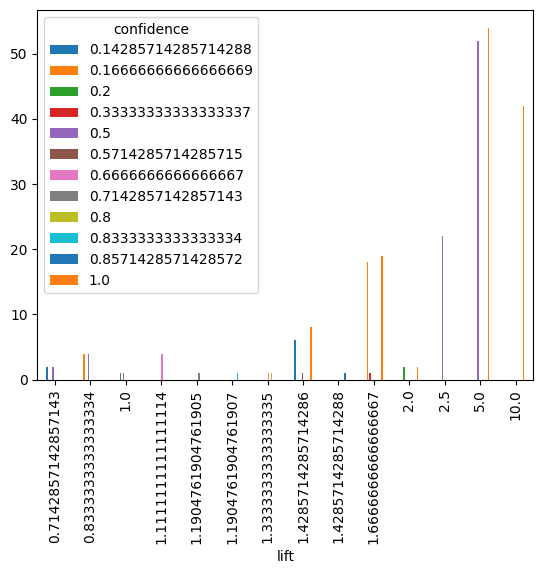

In [50]:
#visualization of rule
pd.crosstab(rules.lift,rules.confidence).plot(kind="bar")

<ipython-input-52-f4f846a5cd48>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules['lift'])


<Axes: xlabel='lift', ylabel='Density'>

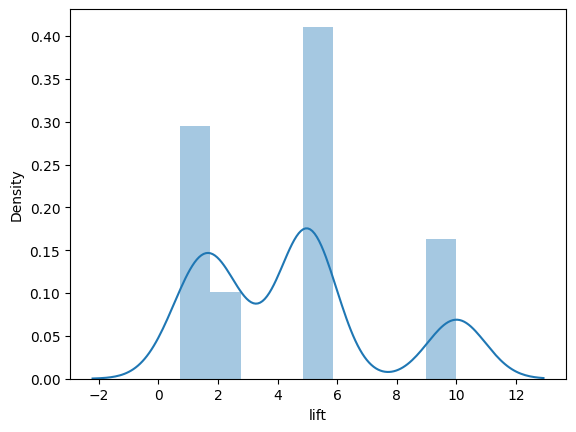

In [52]:
import seaborn as sns
sns.distplot(rules['lift'])

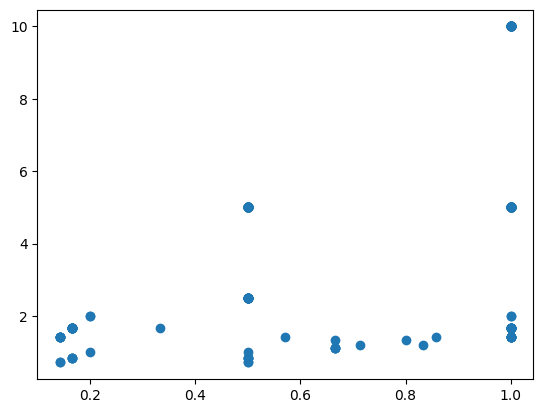

In [54]:
import matplotlib.pyplot as plt
plt.scatter(rules.confidence,rules.lift)

In [56]:
#2
frequent_itemsets = apriori(df1, min_support=0.3, use_colnames=True)
frequent_itemsets

support                           itemsets
0      0.6                      (Sixth Sense)
1      0.7                        (Gladiator)
2      0.6                          (Patriot)
3      0.5           (Sixth Sense, Gladiator)
4      0.4             (Patriot, Sixth Sense)
5      0.6               (Patriot, Gladiator)
6      0.4  (Patriot, Sixth Sense, Gladiator)

In [57]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules1

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6     (Patriot, Sixth Sense)               (Gladiator)                 0.4   
7       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
8   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
9                  (Patriot)  (Sixth Sense, Gladiator)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
11               (Gladiator)    (Patriot, Sixth Sense)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
7                  0.6      0.4    0.666667  1.111111      0.04         1.2  
8                  0.6      0.4    0.800000  1.333333      0.10         2.0  
9                  0.5      0.4    0.666667  1.333333      0.10         1.5  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4

In [58]:
rules1[rules1.duplicated()].shape

(0, 9)

In [59]:
rules1.sort_values('lift',ascending = False)[0:20]

antecedents               consequents  antecedent support  \
5                (Gladiator)                 (Patriot)                 0.7   
4                  (Patriot)               (Gladiator)                 0.6   
6     (Patriot, Sixth Sense)               (Gladiator)                 0.4   
11               (Gladiator)    (Patriot, Sixth Sense)                 0.7   
8   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
9                  (Patriot)  (Sixth Sense, Gladiator)                 0.6   
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
7       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   

    consequent support  support  confidence      lift  leverage  conviction  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4  
8                  0.6      0.4    0.800000  1.333333      0.10         2.0  
9                  0.5      0.4    0.666667  1.333333      0.10         1.5  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
7                  0.6      0.4    0.666667  1.111111      0.04         1.2  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2

In [60]:
rules1[rules1.lift>1]

antecedents               consequents  antecedent support  \
0              (Sixth Sense)               (Gladiator)                 0.6   
1                (Gladiator)             (Sixth Sense)                 0.7   
2                  (Patriot)             (Sixth Sense)                 0.6   
3              (Sixth Sense)                 (Patriot)                 0.6   
4                  (Patriot)               (Gladiator)                 0.6   
5                (Gladiator)                 (Patriot)                 0.7   
6     (Patriot, Sixth Sense)               (Gladiator)                 0.4   
7       (Patriot, Gladiator)             (Sixth Sense)                 0.6   
8   (Sixth Sense, Gladiator)                 (Patriot)                 0.5   
9                  (Patriot)  (Sixth Sense, Gladiator)                 0.6   
10             (Sixth Sense)      (Patriot, Gladiator)                 0.6   
11               (Gladiator)    (Patriot, Sixth Sense)                 0.7   

    consequent support  support  confidence      lift  leverage  conviction  
0                  0.7      0.5    0.833333  1.190476      0.08         1.8  
1                  0.6      0.5    0.714286  1.190476      0.08         1.4  
2                  0.6      0.4    0.666667  1.111111      0.04         1.2  
3                  0.6      0.4    0.666667  1.111111      0.04         1.2  
4                  0.7      0.6    1.000000  1.428571      0.18         inf  
5                  0.6      0.6    0.857143  1.428571      0.18         2.8  
6                  0.7      0.4    1.000000  1.428571      0.12         inf  
7                  0.6      0.4    0.666667  1.111111      0.04         1.2  
8                  0.6      0.4    0.800000  1.333333      0.10         2.0  
9                  0.5      0.4    0.666667  1.333333      0.10         1.5  
10                 0.6      0.4    0.666667  1.111111      0.04         1.2  
11                 0.4      0.4    0.571429  1.428571      0.12         1.4

<Axes: xlabel='lift'>

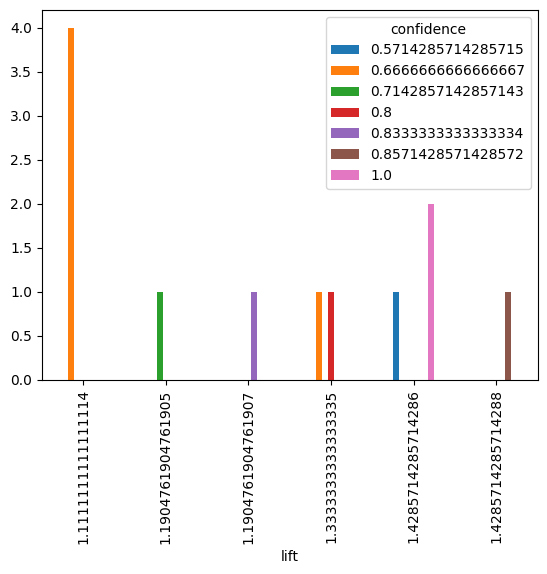

In [61]:
pd.crosstab(rules1.lift,rules1.confidence).plot(kind="bar")

<ipython-input-62-043e47aff10f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules1['lift'])


<Axes: xlabel='lift', ylabel='Density'>

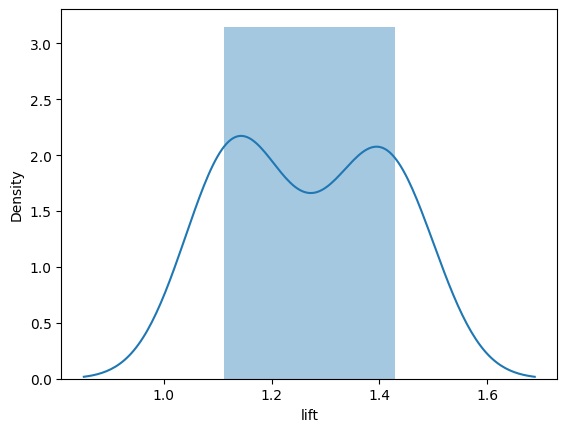

In [62]:
sns.distplot(rules1['lift'])

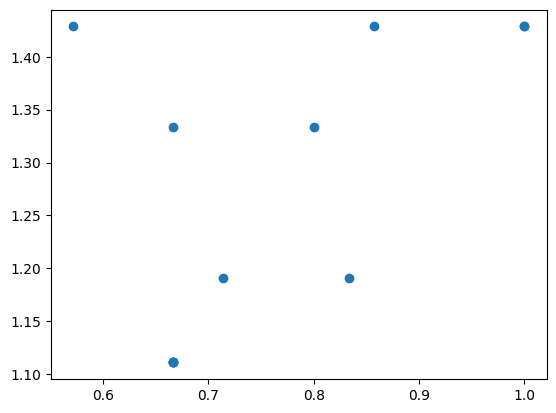

In [63]:
plt.scatter(rules1.confidence,rules1.lift)

In [65]:
#3
frequent_itemsets = apriori(df1, min_support=0.5, use_colnames=True)
frequent_itemsets

support                  itemsets
0      0.6             (Sixth Sense)
1      0.7               (Gladiator)
2      0.6                 (Patriot)
3      0.5  (Sixth Sense, Gladiator)
4      0.6      (Patriot, Gladiator)

In [66]:
rules2 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules2

antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2      (Patriot)    (Gladiator)                 0.6                 0.7   
3    (Gladiator)      (Patriot)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.6    1.000000  1.428571      0.18         inf  
3      0.6    0.857143  1.428571      0.18         2.8

In [67]:
rules2[rules2.duplicated()].shape

(0, 9)

In [68]:
rules2.sort_values('lift',ascending = False)[0:20]

antecedents    consequents  antecedent support  consequent support  \
3    (Gladiator)      (Patriot)                 0.7                 0.6   
2      (Patriot)    (Gladiator)                 0.6                 0.7   
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  
3      0.6    0.857143  1.428571      0.18         2.8  
2      0.6    1.000000  1.428571      0.18         inf  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4

In [69]:
rules2[rules2.lift>1]

antecedents    consequents  antecedent support  consequent support  \
0  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
1    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
2      (Patriot)    (Gladiator)                 0.6                 0.7   
3    (Gladiator)      (Patriot)                 0.7                 0.6   

   support  confidence      lift  leverage  conviction  
0      0.5    0.833333  1.190476      0.08         1.8  
1      0.5    0.714286  1.190476      0.08         1.4  
2      0.6    1.000000  1.428571      0.18         inf  
3      0.6    0.857143  1.428571      0.18         2.8

<Axes: xlabel='lift'>

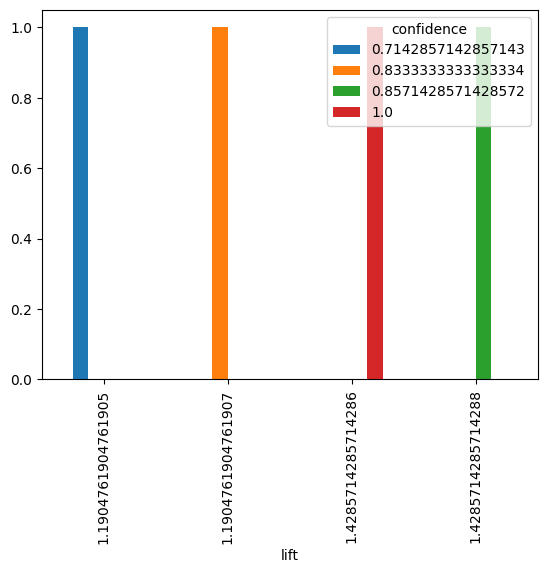

In [70]:
pd.crosstab(rules2.lift,rules2.confidence).plot(kind="bar")

<ipython-input-71-10b288253db0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules2['lift'])


<Axes: xlabel='lift', ylabel='Density'>

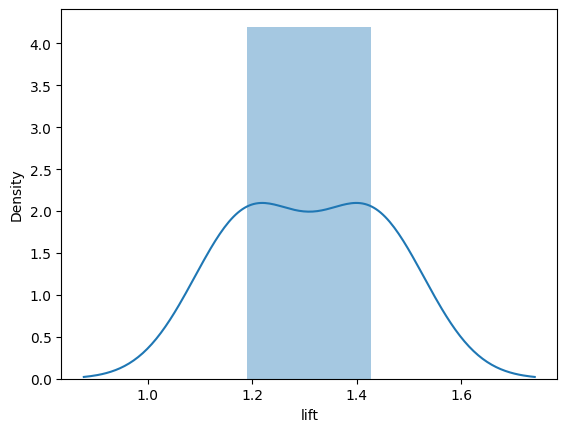

In [71]:
sns.distplot(rules2['lift'])

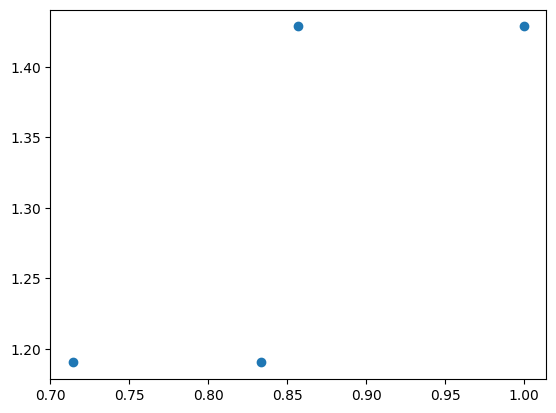

In [72]:
plt.scatter(rules2.confidence,rules2.lift)

In [74]:
#4
frequent_itemsets = apriori(df1, min_support=0.6, use_colnames=True)
frequent_itemsets

support              itemsets
0      0.6         (Sixth Sense)
1      0.7           (Gladiator)
2      0.6             (Patriot)
3      0.6  (Patriot, Gladiator)

In [75]:
rules3 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.9)
rules3

antecedents  consequents  antecedent support  consequent support  support  \
0    (Patriot)  (Gladiator)                 0.6                 0.7      0.6   
1  (Gladiator)    (Patriot)                 0.7                 0.6      0.6   

   confidence      lift  leverage  conviction  
0    1.000000  1.428571      0.18         inf  
1    0.857143  1.428571      0.18         2.8

In [76]:
rules3[rules3.duplicated()].shape

(0, 9)

In [77]:
rules3.sort_values('lift',ascending = False)[0:20]

antecedents  consequents  antecedent support  consequent support  support  \
1  (Gladiator)    (Patriot)                 0.7                 0.6      0.6   
0    (Patriot)  (Gladiator)                 0.6                 0.7      0.6   

   confidence      lift  leverage  conviction  
1    0.857143  1.428571      0.18         2.8  
0    1.000000  1.428571      0.18         inf

In [78]:
rules3[rules3.lift>1]

antecedents  consequents  antecedent support  consequent support  support  \
0    (Patriot)  (Gladiator)                 0.6                 0.7      0.6   
1  (Gladiator)    (Patriot)                 0.7                 0.6      0.6   

   confidence      lift  leverage  conviction  
0    1.000000  1.428571      0.18         inf  
1    0.857143  1.428571      0.18         2.8

<Axes: xlabel='lift'>

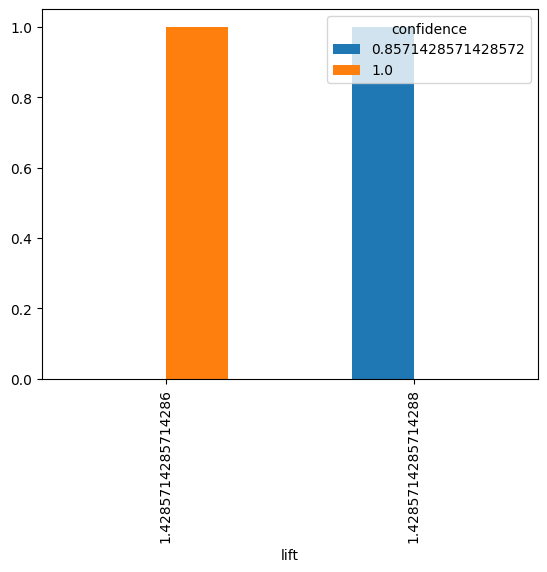

In [79]:
pd.crosstab(rules3.lift,rules3.confidence).plot(kind="bar")

<ipython-input-80-a559503b1d9a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules3['lift'])


<Axes: xlabel='lift', ylabel='Density'>

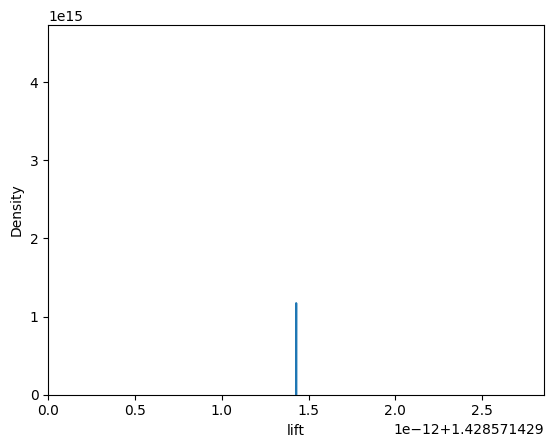

In [80]:
sns.distplot(rules3['lift'])

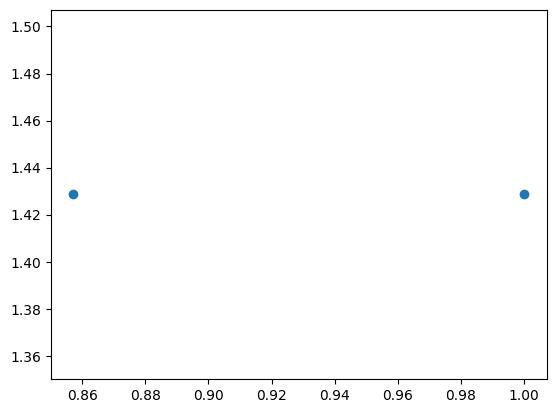

In [81]:
plt.scatter(rules3.confidence,rules3.lift)

In [ ]:
#Q.2

In [82]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [83]:
from google.colab import files
uploaded=files.upload()

Saving book.csv to book (1).csv


In [84]:
fd=pd.read_csv("book.csv")
fd

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  \
0            0         1        0         1       0       0        1   
1            1         0        0         0       0       0        0   
2            0         0        0         0       0       0        0   
3            1         1        1         0       1       0        1   
4            0         0        1         0       0       0        1   
...        ...       ...      ...       ...     ...     ...      ...   
1995         0         0        1         0       0       1        1   
1996         0         0        0         0       0       0        0   
1997         0         0        0         0       0       0        0   
1998         0         0        1         0       0       0        0   
1999         0         0        0         0       0       0        0   

      ItalCook  ItalAtlas  ItalArt  Florence  
0            0          0        0         0  
1            0          0        0         0  
2            0          0        0         0  
3            0          0        0         0  
4            0          0        0         0  
...        ...        ...      ...       ...  
1995         1          0        1         1  
1996         0          0        0         0  
1997         0          0        0         0  
1998         0          0        0         0  
1999         0          0        0         0  

[2000 rows x 11 columns]

In [85]:
fd.head()

ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0

In [87]:
#apriori algorithm
#1
frequent_itemsets = apriori(fd, min_support= 0.1, use_colnames=True)
frequent_itemsets

support                       itemsets
0    0.4230                     (ChildBks)
1    0.2475                     (YouthBks)
2    0.4310                      (CookBks)
3    0.2820                     (DoItYBks)
4    0.2145                       (RefBks)
5    0.2410                       (ArtBks)
6    0.2760                      (GeogBks)
7    0.1135                     (ItalCook)
8    0.1085                     (Florence)
9    0.1650           (YouthBks, ChildBks)
10   0.2560            (ChildBks, CookBks)
11   0.1840           (DoItYBks, ChildBks)
12   0.1515             (ChildBks, RefBks)
13   0.1625             (ChildBks, ArtBks)
14   0.1950            (ChildBks, GeogBks)
15   0.1620            (YouthBks, CookBks)
16   0.1155           (YouthBks, DoItYBks)
17   0.1010             (YouthBks, ArtBks)
18   0.1205            (YouthBks, GeogBks)
19   0.1875            (DoItYBks, CookBks)
20   0.1525              (RefBks, CookBks)
21   0.1670              (ArtBks, CookBks)
22   0.1925             (CookBks, GeogBks)
23   0.1135            (CookBks, ItalCook)
24   0.1055             (DoItYBks, RefBks)
25   0.1235             (DoItYBks, ArtBks)
26   0.1325            (DoItYBks, GeogBks)
27   0.1105              (RefBks, GeogBks)
28   0.1275              (ArtBks, GeogBks)
29   0.1290  (YouthBks, ChildBks, CookBks)
30   0.1460  (DoItYBks, ChildBks, CookBks)
31   0.1225    (ChildBks, CookBks, RefBks)
32   0.1265    (ChildBks, ArtBks, CookBks)
33   0.1495   (ChildBks, CookBks, GeogBks)
34   0.1045  (DoItYBks, ChildBks, GeogBks)
35   0.1020    (ChildBks, ArtBks, GeogBks)
36   0.1015    (DoItYBks, ArtBks, CookBks)
37   0.1085   (DoItYBks, CookBks, GeogBks)
38   0.1035     (ArtBks, CookBks, GeogBks)

In [88]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rules

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  

[100 rows x 9 columns]

In [89]:
rules.sort_values('lift',ascending = False)[0:20]

antecedents          consequents  antecedent support  \
28            (CookBks)           (ItalCook)              0.4310   
29           (ItalCook)            (CookBks)              0.1135   
76   (ChildBks, ArtBks)            (GeogBks)              0.1625   
81            (GeogBks)   (ChildBks, ArtBks)              0.2760   
86             (ArtBks)  (DoItYBks, CookBks)              0.2410   
83  (DoItYBks, CookBks)             (ArtBks)              0.1875   
99            (GeogBks)    (ArtBks, CookBks)              0.2760   
94    (ArtBks, CookBks)            (GeogBks)              0.1670   
97             (ArtBks)   (CookBks, GeogBks)              0.2410   
96   (CookBks, GeogBks)             (ArtBks)              0.1925   
52  (ChildBks, CookBks)             (RefBks)              0.2560   
57             (RefBks)  (ChildBks, CookBks)              0.2145   
80             (ArtBks)  (ChildBks, GeogBks)              0.2410   
77  (ChildBks, GeogBks)             (ArtBks)              0.1950   
85           (DoItYBks)    (ArtBks, CookBks)              0.2820   
84    (ArtBks, CookBks)           (DoItYBks)              0.1670   
64  (ChildBks, CookBks)            (GeogBks)              0.2560   
69            (GeogBks)  (ChildBks, CookBks)              0.2760   
88  (DoItYBks, CookBks)            (GeogBks)              0.1875   
93            (GeogBks)  (DoItYBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
28              0.1135   0.1135    0.263341  2.320186  0.064582    1.203406  
29              0.4310   0.1135    1.000000  2.320186  0.064582         inf  
76              0.2760   0.1020    0.627692  2.274247  0.057150    1.944628  
81              0.1625   0.1020    0.369565  2.274247  0.057150    1.328448  
86              0.1875   0.1015    0.421162  2.246196  0.056313    1.403674  
83              0.2410   0.1015    0.541333  2.246196  0.056313    1.654797  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  
94              0.2760   0.1035    0.619760  2.245509  0.057408    1.904063  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
52              0.2145   0.1225    0.478516  2.230842  0.067588    1.506277  
57              0.2560   0.1225    0.571096  2.230842  0.067588    1.734652  
80              0.1950   0.1020    0.423237  2.170444  0.055005    1.395719  
77              0.2410   0.1020    0.523077  2.170444  0.055005    1.591452  
85              0.1670   0.1015    0.359929  2.155264  0.054406    1.301418  
84              0.2820   0.1015    0.607784  2.155264  0.054406    1.830626  
64              0.2760   0.1495    0.583984  2.115885  0.078844    1.740319  
69              0.2560   0.1495    0.541667  2.115885  0.078844    1.623273  
88              0.2760   0.1085    0.578667  2.096618  0.056750    1.718354  
93              0.1875   0.1085    0.393116  2.096618  0.056750    1.338806

In [90]:
rules[rules.lift>1]

antecedents         consequents  antecedent support  \
0           (YouthBks)          (ChildBks)              0.2475   
1           (ChildBks)          (YouthBks)              0.4230   
2           (ChildBks)           (CookBks)              0.4230   
3            (CookBks)          (ChildBks)              0.4310   
4           (DoItYBks)          (ChildBks)              0.2820   
..                 ...                 ...                 ...   
95   (ArtBks, GeogBks)           (CookBks)              0.1275   
96  (CookBks, GeogBks)            (ArtBks)              0.1925   
97            (ArtBks)  (CookBks, GeogBks)              0.2410   
98           (CookBks)   (ArtBks, GeogBks)              0.4310   
99           (GeogBks)   (ArtBks, CookBks)              0.2760   

    consequent support  support  confidence      lift  leverage  conviction  
0               0.4230   0.1650    0.666667  1.576044  0.060308    1.731000  
1               0.2475   0.1650    0.390071  1.576044  0.060308    1.233750  
2               0.4310   0.2560    0.605201  1.404179  0.073687    1.441240  
3               0.4230   0.2560    0.593968  1.404179  0.073687    1.421069  
4               0.4230   0.1840    0.652482  1.542511  0.064714    1.660347  
..                 ...      ...         ...       ...       ...         ...  
95              0.4310   0.1035    0.811765  1.883445  0.048547    3.022812  
96              0.2410   0.1035    0.537662  2.230964  0.057107    1.641657  
97              0.1925   0.1035    0.429461  2.230964  0.057107    1.415327  
98              0.1275   0.1035    0.240139  1.883445  0.048547    1.148237  
99              0.1670   0.1035    0.375000  2.245509  0.057408    1.332800  

[100 rows x 9 columns]

In [91]:
#visualization of rules
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-92-bbc64804f693>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rules['lift'])


<Axes: xlabel='lift', ylabel='Density'>

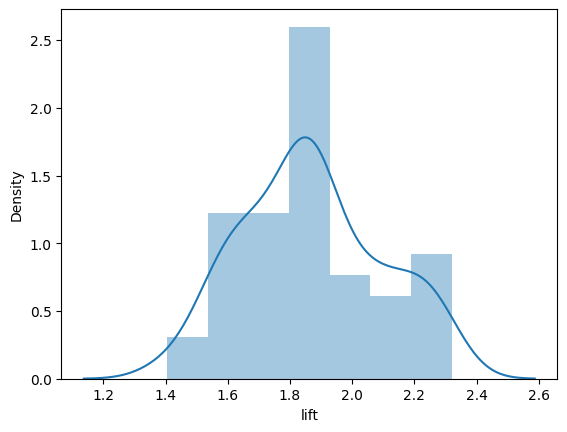

In [92]:
sns.distplot(rules['lift'])

<Axes: >

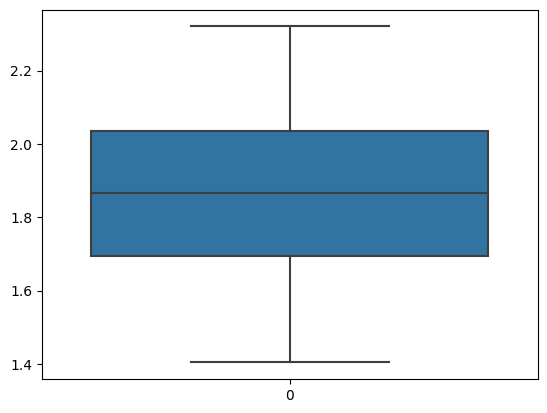

In [93]:
sns.boxplot(rules["lift"])

<Axes: >

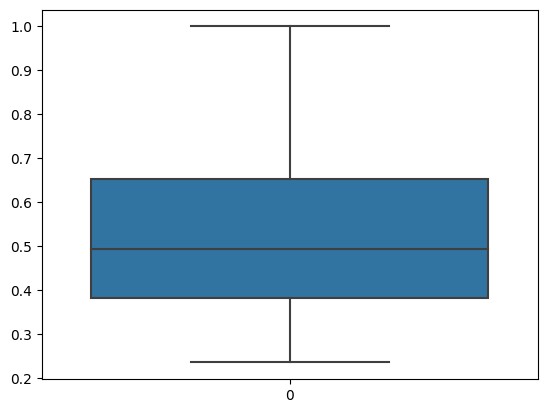

In [94]:
sns.boxplot(rules["confidence"])

<Axes: xlabel='support', ylabel='confidence'>

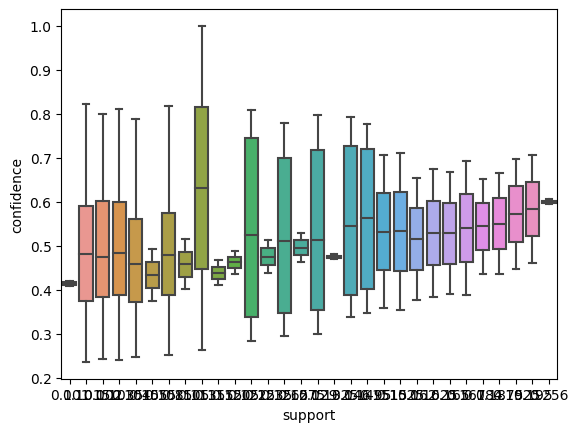

In [95]:
sns.boxplot(x="support",y="confidence",data=rules)

<Axes: xlabel='lift', ylabel='confidence'>

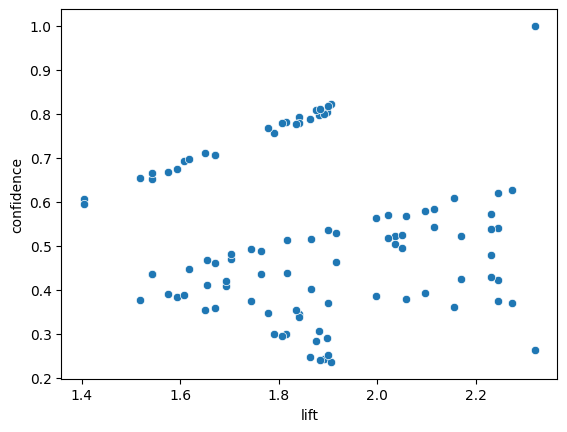

In [96]:
sns.scatterplot(x="lift",y="confidence",data=rules)

In [97]:
#2
frequent_itemsets = apriori(fd, min_support=0.2, use_colnames=True)
frequent_itemsets

support             itemsets
0   0.4230           (ChildBks)
1   0.2475           (YouthBks)
2   0.4310            (CookBks)
3   0.2820           (DoItYBks)
4   0.2145             (RefBks)
5   0.2410             (ArtBks)
6   0.2760            (GeogBks)
7   0.2560  (ChildBks, CookBks)

In [98]:
rules1 = association_rules(frequent_itemsets, metric="lift", min_threshold=0.6)
rules1

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

In [99]:
rules1.sort_values('lift',ascending = False)[0:20]

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

In [100]:
rules1[rules1.lift>1]

antecedents consequents  antecedent support  consequent support  support  \
0  (ChildBks)   (CookBks)               0.423               0.431    0.256   
1   (CookBks)  (ChildBks)               0.431               0.423    0.256   

   confidence      lift  leverage  conviction  
0    0.605201  1.404179  0.073687    1.441240  
1    0.593968  1.404179  0.073687    1.421069

Text(0.5, 0, 'lift')

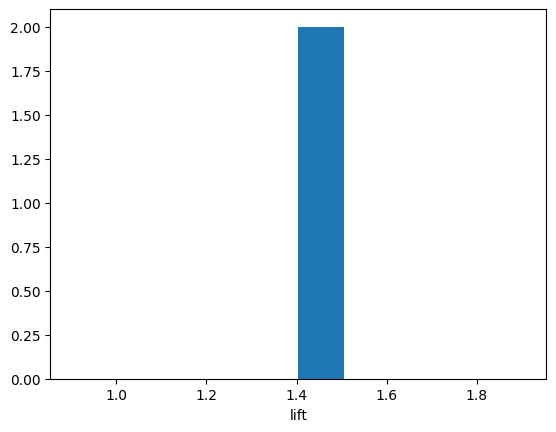

In [101]:
plt.hist(rules1['lift'])
plt.xlabel('lift')

<Axes: xlabel='support', ylabel='confidence'>

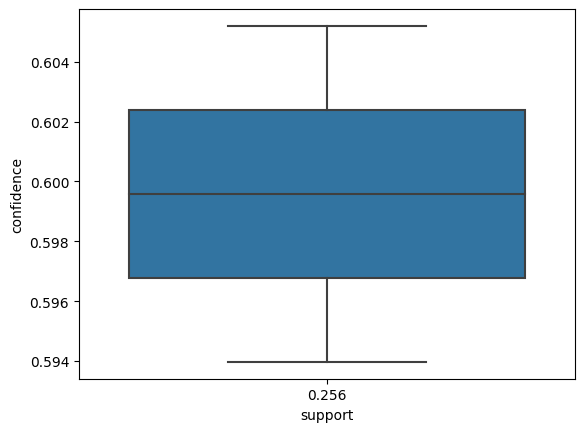

In [102]:
sns.boxplot(x="support",y="confidence",data=rules1)

<Axes: >

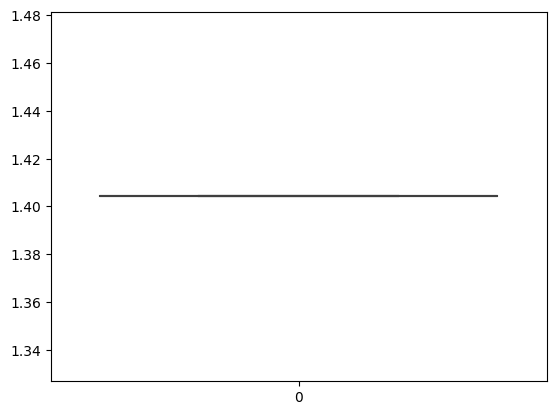

In [103]:
sns.boxplot(rules1["lift"])

<Axes: xlabel='lift', ylabel='confidence'>

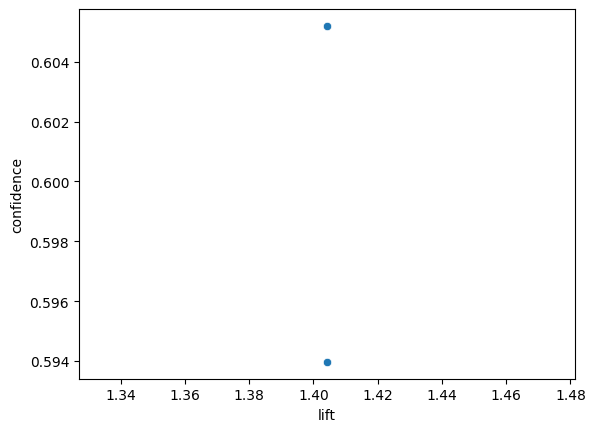

In [104]:
sns.scatterplot(x="lift",y="confidence",data=rules1)